<h1 align="center">Advanced Image Processing and Analysis</h1>
<h3 align="center">ECE 4438B/ECE 9022/ECE 9202B/BIOMED 9519B/BIOPHYS 9519B/CAMI 9519B</h3>
<h4 align="center"><a href="mailto:echen29@uwo.ca"> Elvis Chen, PhD, LL</a></h4>
<h4 align="center">Robarts Research Institute, London</h4>
<h4 align="center">Department of Electrical and Computer Engineering, Western University</h4>
<h4 align="center">School of Biomedical Engineering, Western University</h4>
<h4 align="center">Department of Medical Biophysics, Western University</h4>
<h4 align="center">Day 03, January 14, 2019</h4>

#### Introduction
So far, we have covered the following:
* Python as a programming language:
  * numerical operations
  * string operations
  * list operations
  * indexing and slicing of string/list
  * writing a simple module
  * scope of variables

With these basic knowledge, we are now able to work with images.

But first, lets define some terminology:

[<b>Image</b>](https://en.oxforddictionaries.com/definition/image) as defined by Oxford Dirctionaries: 
* A representation of the external form of a person or thing
* A visible impression obtained by a camera, telescope, microscope, or other device, or displayed on a computer or video screen
* A mental representation or idea

All these are valid definition, because:

(Let's download some medical images and display them)

In [1]:
# let's load a "volume" and display a slice (image) of a brain

# we need to use some functions in Simple ITK:
import SimpleITK as sitk

%run update_path_to_download_script
from downloaddata import fetch_data, fetch_data_all

print(sitk.Version()) # make sure we have loaded SimpleITK successfully and ran a script that allows us to download some data

SimpleITK Version: 1.2.0 (ITK 4.13)
Compiled: Jan  3 2019 15:43:30



In [2]:
# In this command, we are executing 3 different commands in a single line of pythong code
#
# fetch_data is a script that will download a file of a given name, and result it as an output
# 
# ReadImage converts it into an internal SimpleITK image format
#
# as we've seen in the previous tutorial, Show will launch an external program (in our case, ImageJ) to display the image

sitk.Show(sitk.ReadImage(fetch_data("cthead1.png"))) # image of head in CT

Fetching cthead1.png


In [3]:
# let's load another image: head in MRI
sitk.Show(sitk.ReadImage(fetch_data("B2.tiff"))) 

Fetching B2.tiff
Downloaded 50196 of 50196 bytes (100.00%)


<b>Question:</b> Does it look like a brain? 
* what is the colour of the skin?
* what is the colour of the white matter?
* what is the colour of the gray matter?
* what is the colour of cerebrospinal fluid (CSF)?
* what is the colour of the bone?
* what does **colour** mean (in the context of medical imaging)?

<b>Image == Imaging</b>
* imaging (physics)
  * How an image is formed depends on the physics of acquisition, hence the same anatomy will have different appearances in different image modalities
    * in general, the appearance of an object in x-ray/CT correlates with its electron density: higher density ==> brighter pixel/voxel in x-ray/CT. For example, bone is brighter than the surrounding soft tissues
      * since most soft tissues in the body are of a similar density, the contrast resolution of x-ray/CT is low for soft-tissues
      * excellent for imaging dense tissues and is therefore commonly used to visualize the skeletal anatomy and vascular structures (using injected x-ray opaque contrast agent)
    * MRI, or magnetic resonance imaging, is a scanning technique in which an artificial magnetic field is created to excite/align magnetic (i.e. water) molecules, which builds up its potential energy. When the field is turned off, the protons gradually return to their normal state which releases the stored potential energy as a form of radio signal that can be measured by receivers in the MRI scanner
      * consult page 49 of Image-Guided Interventions (editor: Peters and Cleary) for more details,
      * excellent for soft tissue differentiation and be used to separately visualize normal and pathological tissues
    * US, or ultrasound, scanner generate pulses of sound which propagate through tissue and reflect energy back when contacting overlapping tissues
      * detect the interface between two sound-transmitting medium (when speed-of-sound are different)
  * designing advanced image-processing algorithms requires a <b>deeper understanding of image formation</b>
* imaging (interpretation)
  * Some of these imaging modalities are not *natural* to human perception, hence, requires some **imagination**
  * These two images are a slice of a *tomogrophic* volume, i.e. a slice-through-the-body
  * Human vision, on the other hand, are evolved to perceive *projective* (3D->2D) images,
  * we need to understand what 3D (or nD) images really mean, and how it is represented in computer
  * understanding what you see an image requires a <b>deeper understanding of the scene</b> (i.e. anatomy)

In [5]:
# 3D volume example
# vol = sitk.ReadImage('..\data\\volumes\grayscale.nrrd')

vol = sitk.ReadImage('../Data//training_001_ct.mha')

In [6]:
# display the entire 3D volume in ImageJ
sitk.Show(vol)

Using ImageJ to display this volume, note the following: 

<img src="training_001_ct_screenshot1.png" style="width:600px"/><br><br>

**Question**: what are we looking at?

Other things to note:
* the header of ImageJ
  * what does 1/29 mean?
  * what does 334.64x334.64mm mean?
  * what does 512x512 mean?
  * what does 16-bit mean?
* the footer of ImageJ
  * what does the slider bar do?

<b>Terminology</b>
* [**pixel**](https://en.wikipedia.org/wiki/Pixel): a minute area on a display screen/pixture, one of many from which an image is composed
  * a base unit, a single piece of data, ...
  * stored in computer by a number, or a tuple
    * a monochrome pixel is represented by a single number, (e.g. CT)
    * but a pixel may have multiple channels: a typical digital camera takes pictures in RGB channels, hence a pixel can be represented by a tuple of [r,g,b] numbers
    * The Microsoft Hololens that we saw on the 1st day of class as RGB+Depth (RGBD) camera
  * in certain imaging modalities it may be possible to define the size of a pixel
    * **spacing* refers to the distance between adjacent pixels
    * not to be confused by the term **resolution**!
      * *let's define the word resolution in the context of imaging* (as opposed to, for example, resolution of a computer monitor)
  * 2D
* [**voxel**](https://en.wikipedia.org/wiki/Voxel): a pixel in 3D

The variable `vol` is stored as an ITK class called Image. We can use the command `print` to display the particular of this instance of class:

In [ ]:
print(vol)

Several things to note:
* the volume is stored in the computer as a 3D array
  * each element in the array is of the type `short`
* what is the `size` of the array, i.e. how many voxels are there?
* what is the `spacing` between the voxel?
  * another way to ask the question is: what is the size of a voxel?
* knowing the size of the voxel, what is the physical size of this volumn?
* there are other attributes associate with the itk::Image class, but we will ignore them for now

In [7]:
# some of the class accessors

# what does each of these mean?
print(vol.GetSize())
print(vol.GetOrigin())
print(vol.GetSpacing())
print(vol.GetDirection())
print(vol.GetNumberOfComponentsPerPixel())

(512, 512, 29)
(0.0, 0.0, 0.0)
(0.653595, 0.653595, 4.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
1


<h1 align="center">Images</h1>

<table width="100%">
<tr style="background-color: red;"><td><font color="white">SimpleITK conventions:</font></td></tr>
<tr><td>
<ul>
<li>Image access is in x,y,z order, image.GetPixel(x,y,z) or image[x,y,z], with zero based indexing.</li>
<li>If the output of an ITK filter has non-zero starting index, then the index will be set to 0, and the origin adjusted accordingly.</li>
</ul>
</td></tr>
</table>

The unique feature of SimpleITK (derived from ITK) as a toolkit for image manipulation and analysis is that it views <b>images as physical objects occupying a bounded region in physical space</b>. In addition images can have different spacing between pixels along each axis, and the axes are not necessarily orthogonal. The following figure illustrates these concepts. 

<img src="ImageOriginAndSpacing.png" style="width:700px"/><br><br>



### Pixel Types

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

There is also `sitkUnknown`, which is used for undefined or erroneous pixel ID's. It has a value of -1.

The 64-bit integer types are not available on all distributions. When not available the value is `sitkUnknown`.

To understand what image origin mean, let's take a look at an example:

Refer to the article [A Night Out of the Museum: Mummies In The CT Scanner](http://newsroom.gehealthcare.com/night-out-of-the-museum-mummies-in-the-ct-scanner/) as an example of medical imaging and image processing:

Mummies in CT:
![mummies in CT](http://newsroom.gehealthcare.com/wp-content/uploads/2016/10/escaneo-momia-guanche-c-699x466.jpg)

The circular object in the CT scanner is the *gantry*: it is a rotating frame with an x-ray tube mounted on one size and a detector on the opposite side. During the scan, the patient lines on a table that is moved through the gantry.

The **image origin**, i.e. the beginning of the volume, can be arbitrary defined: the edge of the table, or (after reconstruction) 1st slice containing the patient anatomy.

Since bones show up as bright regions in CT, it can be **segmented** by thresholding:
    
![bones in CT](http://newsroom.gehealthcare.com/wp-content/uploads/2016/10/Momia-1-plano.gif)

Advanced visualization can be achieved via [volume rendering and transfer functions](https://en.wikipedia.org/wiki/Volume_rendering):
![transfer function and volume rendering](http://newsroom.gehealthcare.com/wp-content/uploads/2016/10/Mummy_animation_1-c.gif)

but this is a subject more relevant to **computer graphics** than image processing/analysis.

## Image Construction

There are a variety of ways to create an image. All images' initial value is well defined as zero.

In [8]:
image = sitk.Image(256, 128, 64, sitk.sitkInt16)

What does each of does do?
* First one create a 3D volume of size [256, 128, 64], each voxel is of type 16-bit integer
  * what is the width, length, and depth?
  * what is the pixel size/spacing?

In [9]:
print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())
print(image.GetSpacing())

256
128
64
(1.0, 1.0, 1.0)


Since the dimension  and pixel type of a SimpleITK image is determined at run-time accessors are needed. 

In [10]:
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)

Note the input parameters (class overloading) and data types.

**Question**: How many channels are there?

In [11]:
print(image_2D.GetNumberOfComponentsPerPixel())

1


**Question**: What is the depth of a 2D image?

In [12]:
print(image_2D.GetSize())
print(image_2D.GetDepth())

(32, 32)
0


**Python Question**: why this size, and what is the data type here?

In [13]:
print(image_2D.GetPixelIDTypeAsString())

32-bit unsigned integer


In [14]:
image_RGB = sitk.Image([128,128], sitk.sitkVectorUInt8, 3)

What does the input parameter `3` does for us?

In [15]:
print(image_RGB.GetNumberOfComponentsPerPixel())

3


**Question**: Is this a 2D image or 3D volume? What is the difference?

In [16]:
print(image_RGB.GetDimension())
print(image_RGB.GetSize())

2
(128, 128)


## Accessing Pixels

There are the member functions ``GetPixel`` and ``SetPixel`` which provides an ITK-like interface for pixel access.

In [17]:
help(image.GetPixel)

Help on method GetPixel in module SimpleITK.SimpleITK:

GetPixel(*idx) method of SimpleITK.SimpleITK.Image instance
    Returns the value of a pixel.
    
    This method takes 2 parameters in 2D: the x and y index,
    and 3 parameters in 3D: the x, y and z index.



In [18]:
print(image.GetPixel(0, 0, 0))
image.SetPixel(0, 0, 0, 1)
print(image.GetPixel(0, 0, 0))

0
1


In [19]:
print(image[0,0,0])
image[0,0,0] = 10
print(image[0,0,0])

1
10


One way to understand how an image/volume is stored in a computer is treat them as 2D/3D array with additional attributes. As such, the `[]` operator allows us to access pixel/voxel directly. Slicing operations (as we have seen from last week's class) also works here.

Going back to `vol` we loaded earlier, we can display a slice of it by using the following command:

In [20]:
zSliceID = 50 # the 51th sliced in the z-direction
sitk.Show(vol[:,:,zSliceID])

IndexError: index  out of bounds

## Conversion between numpy and SimpleITK

[numpy](http://www.numpy.org/) is the fundamental package for scientific computing with Pythong. It contains, among other things:
* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities
* (for those of us who uses matlab) Matlab-like functionalities

We can convert an SimpleITK Image into a numeric array:

In [21]:
nda = sitk.GetArrayFromImage(image)
print(nda)

[[[10  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]


In [22]:
help(sitk.GetArrayFromImage)

Help on function GetArrayFromImage in module SimpleITK.SimpleITK:

GetArrayFromImage(image)
    Get a NumPy ndarray from a SimpleITK Image.
    
    This is a deep copy of the image buffer and is completely safe and without potential side effects.



**what does deep copy mean**?

In [23]:
# Get a view of the image data as a numpy array, useful for display
nda = sitk.GetArrayViewFromImage(image)

In [24]:
help(sitk.GetArrayViewFromImage)

Help on function GetArrayViewFromImage in module SimpleITK.SimpleITK:

GetArrayViewFromImage(image)
    Get a NumPy ndarray view of a SimpleITK Image.
    
    Returns a Numpy ndarray object as a "view" of the SimpleITK's Image buffer. This reduces pixel buffer copies, but requires that the SimpleITK image object is kept around while the buffer is being used.



In [25]:
print(nda)

[[[10  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]


In [26]:
nda = sitk.GetArrayFromImage(image_RGB)
img = sitk.GetImageFromArray(nda)
img.GetSize()

(3, 128, 128)

In [27]:
help(sitk.GetImageFromArray)

Help on function GetImageFromArray in module SimpleITK.SimpleITK:

GetImageFromArray(arr, isVector=None)
    Get a SimpleITK Image from a numpy array. If isVector is True, then the Image will have a Vector pixel type, and the last dimension of the array will be considered the component index. By default when isVector is None, 4D images are automatically considered 3D vector images.



Remember `image_RGB` is a 2D image with 3 channels. What is `img`?

In [28]:
image_RGB.GetSize()

(128, 128)

In [29]:
img = sitk.GetImageFromArray(nda, isVector=True)
print(img)

VectorImage (0x7ffb99b762b0)
  RTTI typeinfo:   itk::VectorImage<unsigned char, 2u>
  Reference Count: 1
  Modified Time: 1974
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 128]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 128]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 128]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  VectorLength: 3
  PixelContainer: 
    ImportImageContainer (0x7ffb99b76480)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned char>
      Reference Count: 1
      Modified Time: 1975
      Debug: Off
      Object Name: 
      Obs

In [30]:
img.GetSize()

(128, 128)

In [31]:
print(img.GetNumberOfComponentsPerPixel())

3


## The order of index and dimensions need careful attention during conversion

SimpleITK::Image has a GetPixel which takes an ITK Index object as an argument, which is an array ordered as ``(x,y,z)``. This is the convention that SimpleITK's Image class uses for the GetPixel method as well.

While in numpy, an array is indexed in the opposite order ``(z,y,x)``.

In [32]:
print(nda.shape)        # previously, nda = sitk.GetArrayFromImage(image_RGB)
print(img.GetSize())    # previously, img = sitk.GetImageFromArray(nda, isVector=True)
print(nda.shape[::-1])

(128, 128, 3)
(128, 128)
(3, 128, 128)


### Are we still dealing with Image, because I haven't seen one yet...

While SimpleITK does not do visualization, it does contain a built in ``Show`` method. This function writes the image out to disk and than launches a program for visualization. By default it is configured to use ImageJ, because it is readily supports all the image types which SimpleITK has and load very quickly. However, it's easily customizable by setting environment variables.

In [33]:
sitk.Show(image)

In [34]:
sitk.Show?

By converting into a numpy array, matplotlib can be used for visualization for integration into the scientific python environment.

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

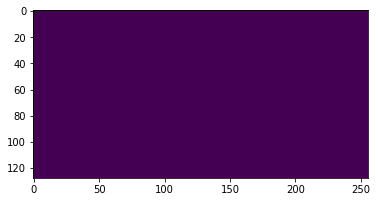

In [36]:
z = 0
slice = sitk.GetArrayViewFromImage(image)[z,:,:]
plt.imshow(slice)

# SimpleITK Hello World Example
In this example, we will use SimpleITK to create a smily face by creating and manupilating image array directly. The code is based on the [Python code](https://itk.org/SimpleITKDoxygen/html/HelloWorld_2HelloWorld_8py-example.html) available on ITK's website.

In [37]:
# create an image
pixelType = sitk.sitkUInt8
imageSize = [128, 128]
image     = sitk.Image(imageSize, pixelType) # note the location of =

In [38]:
# Create a face image
faceSize   = [64, 64]
faceCenter = [64, 64]
face       = sitk.GaussianSource(pixelType, imageSize, faceSize, faceCenter)

In [39]:
# to visualize what GaussianSource does, we can display the image using the following code
#
# what is the code?

**Enter the missing codes here**

In [40]:
# Create eye images
eyeSize    = [5, 5]
eye1Center = [48, 48]
eye2Center = [80, 48]
eye1       = sitk.GaussianSource(pixelType, imageSize, eyeSize, eye1Center, 150)
eye2       = sitk.GaussianSource(pixelType, imageSize, eyeSize, eye2Center, 150) # what does "150" do?

In [41]:
# what is the command to display the function description (assuming it is embedded in the code by ``` ```)
#
# what is the code?

We have seen 2 ways to display the help functions. What are they?  **Enter them here**

In [42]:
# Apply the eyes to the face
face = face - eye1 - eye2
face = sitk.BinaryThreshold(face, 200, 255, 255)

In [43]:
# Create the mouth
mouthRadii  = [30, 20]
mouthCenter = [64, 76]
mouth       = 255 - sitk.BinaryThreshold( sitk.GaussianSource(pixelType, imageSize, mouthRadii, mouthCenter), 200, 255, 255)

In [44]:
# Paste the mouth into the face
mouthSize = [64, 18]
mouthLoc  = [32, 76]
face      = sitk.Paste(face, mouth, mouthSize, mouthLoc, mouthLoc) 

In [45]:
# apply the face to the original image
image = image + face

In [46]:
# Display the result
sitk.Show(image, title='Helloworld: Python', debugOn=True)

Here, we have created our first SITK Image by direct array manipulation.